Мышковец С.А., v.01 16.10.2022

Решение задачи: Работа с изображениями. Аугментация.

1. Изображения, на которых автомобили есть или нет. 100 изображений целевого класса и 100 нецелевого. Размер 256x256px.
2. Библиотеки: OpenCV, pillow, scikit-image, tf.image. 
3. Аугментация (вращение, растяжение/сжатие, увеличение/уменьшение). Количество изображений должно увеличиться минимум в 3 раза.

Вывод:
1. Перед началом работы переименовать файлы и привести в 1 формат.
2. Важно! Пусть к файлам и папкам должен быть правильно сформирован.
3. Проверять типы возвращаемых файлов.
4. При изменении размера изображения путем увеличения его части, обрезании участока, выходящих за границы, и последующем приведении этой части к общему размеру можно потерять на изображении целевой объект.


# Переименовать все файлы в папке

In [1]:
# import os
# path = r'no auto'
# files = os.listdir(path)


# for index, file in enumerate(files):
#     os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))

# Приводим изображения к размеру 256x256px.

In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
import os

# graph_def = tf.compat.v1.GraphDef()
# labels = []

# # These are set to the default names from exported models, update as needed.
# filename = "model.pb"
# labels_filename = "labels.txt"

# # Import the TF graph
# with tf.io.gfile.GFile(filename, 'rb') as f:
#     graph_def.ParseFromString(f.read())
#     tf.import_graph_def(graph_def, name='')

# # Create a list of labels.
# with open(labels_filename, 'rt') as lf:
#     for l in lf:
#         labels.append(l.strip())

In [4]:
def convert_to_opencv(image):
    # RGB -> BGR conversion is performed as well(if you pass correct arguments to np.array([r,g,b]).transpose()).
    image = image.convert('RGB')
    r,g,b = np.array(image).T
    opencv_image = np.array([r,g,b]).transpose()
    return opencv_image

def crop_center(img,cropx,cropy):
    h, w = img.shape[:2]
    startx = w//2-(cropx//2)
    starty = h//2-(cropy//2)
    return img[starty:starty+cropy, startx:startx+cropx]

def resize_down_to_1600_max_dim(image):
    h, w = image.shape[:2]
    if (h < 1600 and w < 1600):
        return image

    new_size = (1600 * w // h, 1600) if (h > w) else (1600, 1600 * h // w)
    return cv2.resize(image, new_size, interpolation = cv2.INTER_LINEAR)

def resize_to_256_square(image):
    h, w = image.shape[:2]
    return cv2.resize(image, (256, 256), interpolation = cv2.INTER_LINEAR)

def update_orientation(image):
    exif_orientation_tag = 0x0112
    if hasattr(image, '_getexif'):
        exif = image._getexif()
        if (exif != None and exif_orientation_tag in exif):
            orientation = exif.get(exif_orientation_tag, 1)
            # orientation is 1 based, shift to zero based and flip/transpose based on 0-based values
            orientation -= 1
            if orientation >= 4:
                image = image.transpose(Image.TRANSPOSE)
            if orientation == 2 or orientation == 3 or orientation == 6 or orientation == 7:
                image = image.transpose(Image.FLIP_TOP_BOTTOM)
            if orientation == 1 or orientation == 2 or orientation == 5 or orientation == 6:
                image = image.transpose(Image.FLIP_LEFT_RIGHT)
    return image

In [5]:
from PIL import Image
import numpy as np
import cv2

# Load from a file
imageFile = r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\auto\0.jpg"


In [6]:
image = Image.open(imageFile)

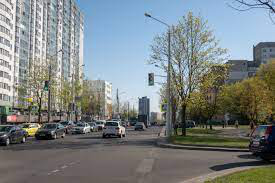

In [7]:
image

In [8]:
# Update orientation based on EXIF tags, if the file has orientation info.
image = update_orientation(image)

# Convert to OpenCV format
image = convert_to_opencv(image)

In [9]:
# If the image has either w or h greater than 1600 we resize it down respecting
# aspect ratio such that the largest dimension is 1600
image = resize_down_to_1600_max_dim(image)

In [10]:
# # We next get the largest center square
# h, w = image.shape[:2]
# min_dim = min(w,h)
# max_square_image = crop_center(image, min_dim, min_dim)

In [11]:
# # Resize that square down to 256x256
# augmented_image = resize_to_256_square(max_square_image)

In [12]:
# Resize that square down to 256x256
augmented_image = resize_to_256_square(image)

In [13]:
type(augmented_image)

numpy.ndarray

In [14]:
image_resized_pil = Image.fromarray(augmented_image)

In [15]:
type(image_resized_pil)

PIL.Image.Image

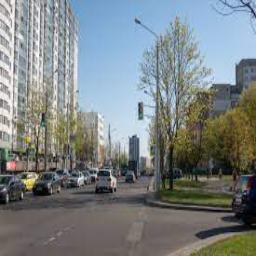

In [16]:
image_resized_pil

In [17]:
image_resized_pil.save(r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\auto 256\vid_5_28420.jfif")

In [18]:
imageFile1 = r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\auto\13.jpg"

In [19]:
image1 = Image.open(imageFile1)

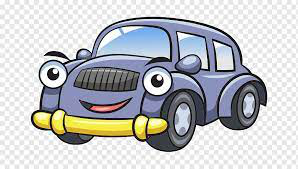

In [20]:
image1

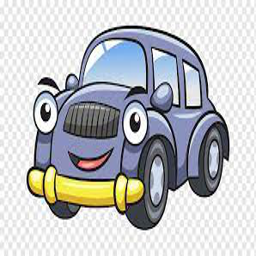

In [21]:
image1.resize((256,256))

In [22]:
type(image1)

PIL.JpegImagePlugin.JpegImageFile

In [23]:
image1.save(r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\auto 256\images (13).jfif")

# CV2

Scaling

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

In [24]:
import cv2
import numpy as np

img = cv2.imread(r"no auto\1.jpg")

res = cv2.resize(img,(256, 256), interpolation = cv2.INTER_LINEAR)

#OR

# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

In [25]:
img_resized = Image.fromarray(res)

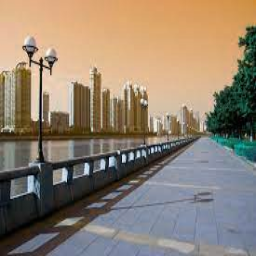

In [26]:
img_resized

In [27]:
img_resized.save(r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_256.jfif")

# Проводим аугментацию.

Rotation

Rotation of an image for an angle \theta is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. 

In [28]:
img = cv2.imread(r"no auto\1.jpg", 0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [29]:
dst= Image.fromarray(dst.astype(np.uint8))

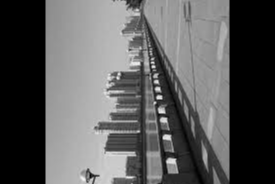

In [30]:
dst

In [31]:
#Поворт на 15 градусов в право относительно центра
img1_ = cv2.imread(r"no auto 256\images10_256.jfif")
(h, w) = img1_.shape[0:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 10, 1.0)
img2 = cv2.warpAffine(img1_, M, (w, h))

In [32]:
img2 = Image.fromarray(img2.astype(np.uint8))

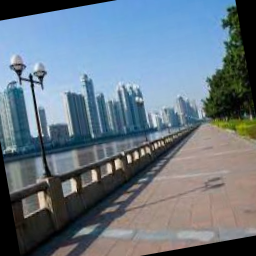

In [33]:
img2

In [34]:
img2.save((r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_rot_15.jfif"))

In [35]:
#Поворт на 90 градусов в право относительно центра
img1_ = cv2.imread(r"no auto 256\images10_256.jfif")
(h, w) = img1_.shape[0:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 90, 1.0)
img3 = cv2.warpAffine(img1_, M, (w, h))

In [36]:
img3 = Image.fromarray(img3.astype(np.uint8))

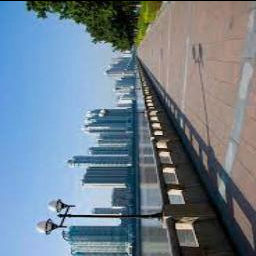

In [37]:
img3

In [38]:
img3.save((r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_rot_90.jfif"))

Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

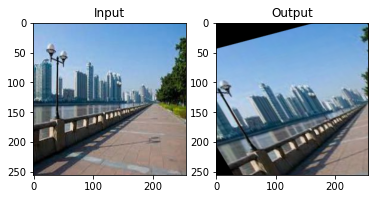

In [39]:
import matplotlib.pyplot as plt
img = cv2.imread(r"no auto 256\images10_256.jfif")
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [40]:
dst = Image.fromarray(dst.astype(np.uint8))

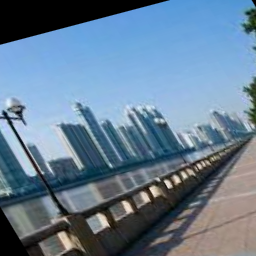

In [41]:
dst

In [42]:
dst.save((r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_af_tr.jfif"))

Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

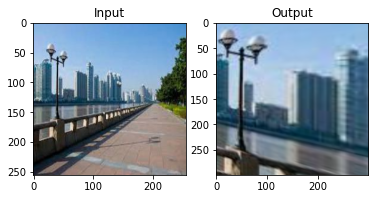

In [43]:
img = cv2.imread(r"no auto 256\images10_256.jfif")
rows,cols,ch = img.shape

pts1 = np.float32([[20,25],[100,50],[20,200],[100,150]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [44]:
dst = Image.fromarray(dst.astype(np.uint8))

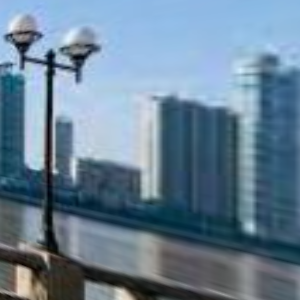

In [45]:
dst

In [46]:
dst.save(r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_persp_tr.jfif")

Horizontal flip

In [47]:
import cv2
img = cv2.imread(r"no auto 256\images10_256.jfif")
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img
img = horizontal_flip(img, True)
# cv2.imshow('Result', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [48]:
type(img)

numpy.ndarray

In [49]:
img = Image.fromarray(img)

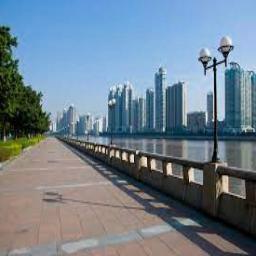

In [50]:
img

In [51]:
img.save(r"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\images10_hor_flip.jfif")

# Аугментируем все изображения в папках.

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
path = r'no auto'

for filename in os.listdir(path):
    path_to_file = path + '\\' + filename
    img = cv2.imread(path_to_file)
    res = cv2.resize(img,(256, 256), interpolation = cv2.INTER_LINEAR)
    img_resized = Image.fromarray(res)
    filename1 = '256_' + filename
    img_resized.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename1}")
    
    path_256 = r'no auto 256'
    path_to_file_256 = path_256 +'\\' + filename1
    img1_ = cv2.imread(path_to_file_256)
    (h, w) = img1_.shape[0:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 10, 1.0)
    img2 = cv2.warpAffine(img1_, M, (w, h))
    img2 = Image.fromarray(img2.astype(np.uint8))
    filename2 ='rot_15_' + filename
    img2.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename2}")
    
    img2_ = cv2.imread(path_to_file_256)
    (h, w) = img2_.shape[0:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 90, 1.0)
    img3 = cv2.warpAffine(img2_, M, (w, h))
    img3 = Image.fromarray(img3.astype(np.uint8))
    filename3 ='rot_90_' + filename
    img3.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename3}")
    
    img3_ = cv2.imread(path_to_file_256)
    rows,cols,ch = img3_.shape
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img3_,M,(cols,rows))
    dst = Image.fromarray(dst.astype(np.uint8))
    filename4 ='af_tr_' + filename
    dst.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename4}")
    
    img4 = cv2.imread(path_to_file_256)
    rows,cols,ch = img4.shape
    pts1 = np.float32([[20,25],[100,50],[20,200],[100,150]])
    pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img4,M,(300,300))
    dst = Image.fromarray(dst.astype(np.uint8))
    filename5 ='persp_tr_' + filename
    dst.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename5}")
    
    img5_ = cv2.imread(path_to_file_256)
    def horizontal_flip(img5_, flag):
        if flag:
            return cv2.flip(img5_, 1)
        else:
            return img5_
    img5 = horizontal_flip(img5_, True)
    img5 = Image.fromarray(img5)
    filename6 ='hor_flip_' + filename
    img5.save(fr"C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\ДЗ10_Мышковец С.А\no auto 256\{filename6}")